In [19]:
import os
import datetime

import IPython
import IPython.display
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import tensorflow as tf


mpl.rcParams['figure.figsize'] = (10, 10)
mpl.rcParams['axes.grid'] = False

In [41]:
df_raw = pd.read_csv('C:\\Users\\Harpreet Singh\\Documents\\Machine Learning\\Untitled Folder\\germany-wind-energy.csv')

df_raw.info() 
#This is 10 minute resoltution data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1094 entries, 0 to 1093
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   utc_timestamp           1094 non-null   object 
 1   wind_generation_actual  1094 non-null   float64
 2   wind_capacity           1094 non-null   float64
 3   temperature             1094 non-null   float64
dtypes: float64(3), object(1)
memory usage: 34.3+ KB


In [42]:
df_raw.describe() 

,wind_generation_actual,wind_capacity,temperature
count,1094.000000,1094.000000,1094.000000
mean,305819.767824,45066.022789,10.050167
std,205728.857915,4315.838061,7.739158
min,16482.000000,37149.130000,-9.363000
25%,148552.750000,41447.937500,3.577250
50%,254332.500000,46073.000000,10.046500
75%,412570.500000,49203.000000,16.566000
max,998899.000000,50452.000000,28.241000


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:3714: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


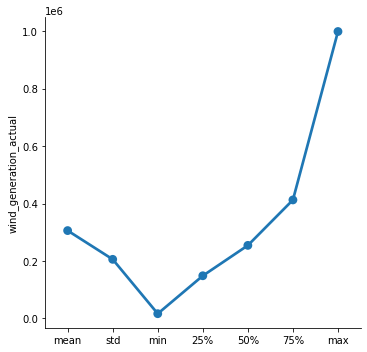

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:3714: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


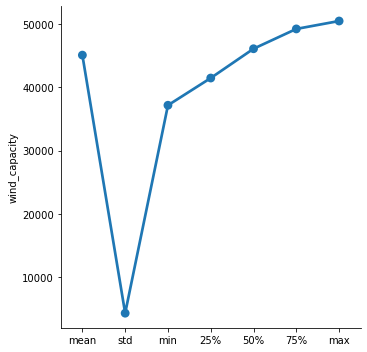

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:3714: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


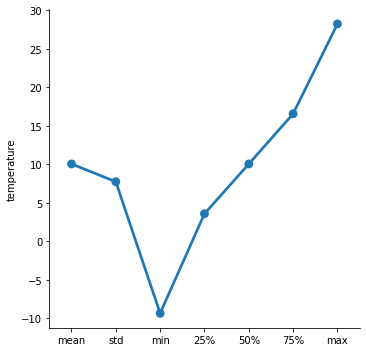

In [43]:
#Lets see if there are any irregulaties with the data 

df_raw_describe = df_raw.describe(include = ['int64','float64'])
df_raw_describe= df_raw_describe.drop('count', axis = 0)


# To remove any variable from plot
num_col = df_raw._get_numeric_data().columns

for i in num_col:  
    if i in ['index']:    
        continue  
    sns.factorplot(x=df_raw_describe.index, y=i, data=df_raw_describe)  
    plt.show()


## The following can be observed from the data: 

1. Standard deviation is higher for Blade1PitchAngle and Reactive Power  

2. Blade2PitchAngle and Blade3PitchAngle have same exact values 

3. ControlBoxTemperature is not needed as the values are just zeroes 

4. Major outlier in TurbineStatus

In [47]:

#Change the unnamed:0 to Datetime 
wind_data = df_raw.copy()
wind_data['utc_timestamp'] = pd.to_datetime(wind_data['utc_timestamp'])
wind_data.rename(columns={'utc_timestamp': 'date_column'}, inplace=True)

In [49]:
#Check for null values
wind_data.isnull().sum()

#There are no null values 

date_column               0
wind_generation_actual    0
wind_capacity             0
temperature               0
dtype: int64

In [52]:
wind_data.shape

(1094, 4)

## Key points about the dataset: 

1. Simple dataset which contains just three columns, wind generation data in MW, wind turbine capacity in MW, Daily temperature in degree C 
2. The 24H low resolution data ranging from 2017 - 2019. (1094, 4) Rows/Columns 
3. No major outliers, and no null values. Dataset is already cleaned 

Text(0, 0.5, 'Actual wind generation')

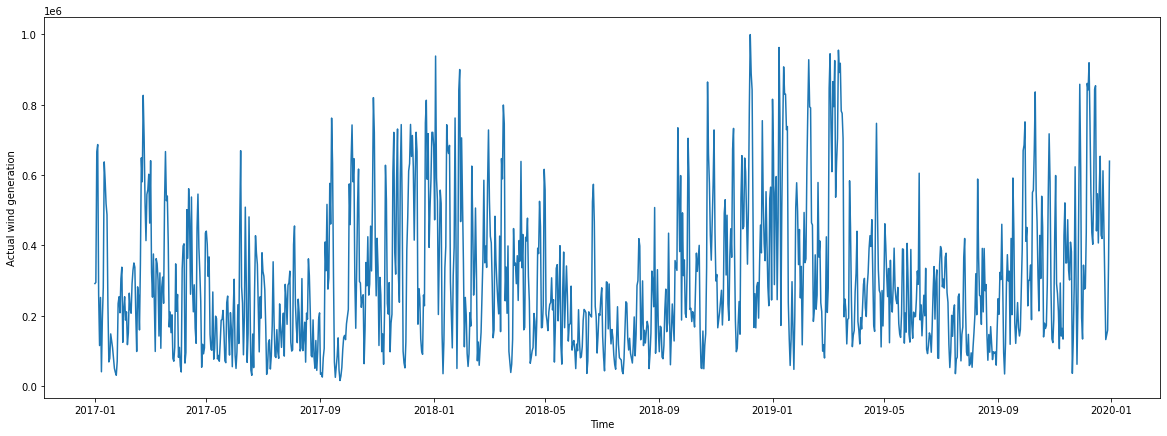

In [54]:
plt.figure(figsize=(20,7))

sns.lineplot(data=wind_data, x="date_column",y="wind_generation_actual")
plt.xlabel("Time")
plt.ylabel("Actual wind generation") 
#Plot for Wind generation data 

### Key point: 

1. In germany Low-wind-power events are generally most frequent in summer (May-August) and least frequent in winters. The same can be seen in the graph 


Text(0, 0.5, 'wind capacity')

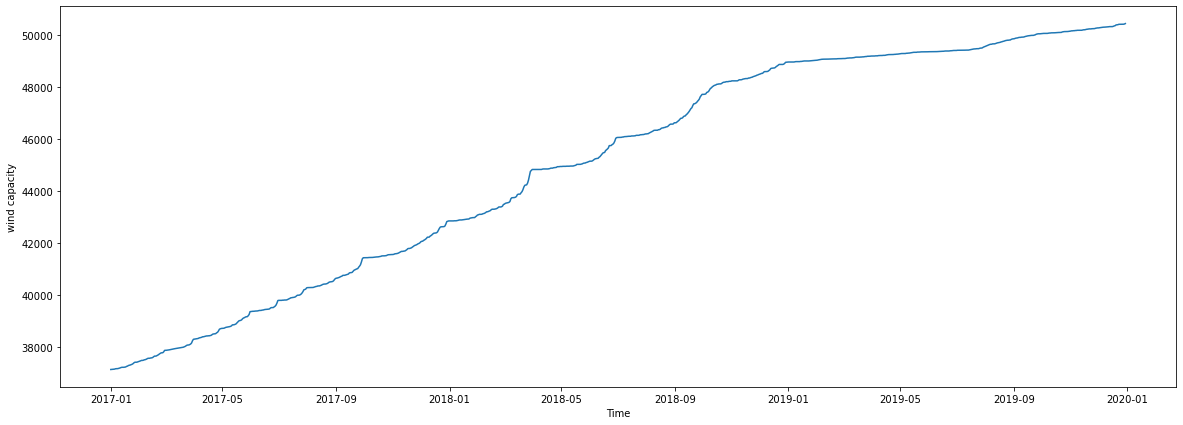

In [56]:
plt.figure(figsize=(20,7))

sns.lineplot(data=wind_data, x="date_column",y="wind_capacity")
plt.xlabel("Time")
plt.ylabel("wind capacity")

### Key point: 

1. It can be noticed that there is a slow and steady expansion of wind capacity. We cannot look at a sample of the data and prove that the expansion is slow in germany but the following articles suggests the same: 
 - https://www.cleanenergywire.org/news/wind-power-expansion-germany-too-slow-report
 


Text(0, 0.5, 'Temperature')

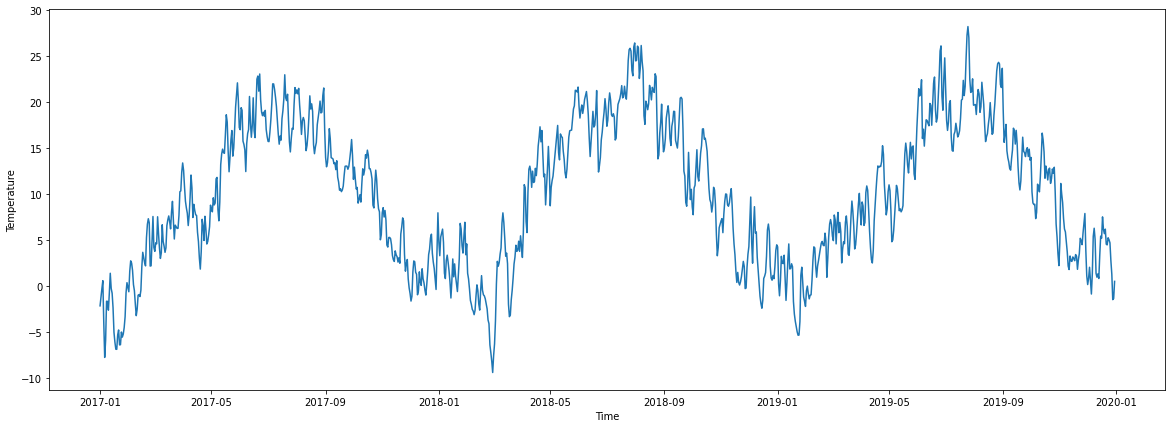

In [59]:
# show the temperature by the years 
plt.figure(figsize=(20,7))

sns.lineplot(data=wind_data, x="date_column",y="temperature")
plt.xlabel("Time")
plt.ylabel("Temperature")

### Key point: 

1.  The highest temperature at summer season the average around 25 , the less temperature and winter season also the temperature less 0 which is the case for Germany



In [60]:
import os  

os.makedirs('folder/subfolder', exist_ok=True)  

wind_data.to_csv('folder/subfolder/wind_data.csv')  